# Rapid proteomic analysis for solid tumors reveals LSD1 as a drug target in an end‐stage cancer patient
#### Doll et al. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6068348/

### Abstract
Recent advances in mass spectrometry (MS)‐based technologies are now set to transform translational cancer proteomics from an idea to a practice. Here, we present a robust proteomic workflow for the analysis of clinically relevant human cancer tissues that allows quantitation of thousands of tumor proteins in several hours of measuring time and a total turnaround of a few days. We applied it to a chemorefractory metastatic case of the extremely rare urachal carcinoma. Quantitative comparison of lung metastases and surrounding tissue revealed several significantly upregulated proteins, among them lysine‐specific histone demethylase 1 (LSD1/KDM1A). LSD1 is an epigenetic regulator and the target of active development efforts in oncology. Thus, clinical cancer proteomics can rapidly and efficiently identify actionable therapeutic options. While currently described for a single case study, we envision that it can be applied broadly to other patients in a similar condition.

### Workflow

![Figure 2](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6068348/bin/MOL2-12-1296-g002.jpg)

**Figure 2** Proteomics workflow for the case study. (A) Timeline of the project. (B) Experimental design, including source of material, inStageTip sample preparation, and depiction of the analytical workflow


### Results

![Figure 3](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6068348/bin/MOL2-12-1296-g003.jpg)

**Figure 3** Proteins differentially expressed in the urachal carcinoma lung metastases. (A) Volcano plot of the p‐values (y‐axis) vs. the log2 protein abundance differences (x‐axis) between metastases and control, with lines of significance colored in black or gray lines corresponding to a 5% or 1% FDR, respectively. (B) Mechanisms of action of LSD1/KDM1A and inhibitory drug treatment proposed: **JATROSOME. TRANYLCYPROMIN**


### Workflow with the Clinical Knowledge Graph

1. Generate Analysis Report: Proteomics data
2. Identify Candidate Drug Treatments
3. Rank Candidates According to Toxicity

![Clinical_Knowledge_Graph](banner.jpg)

## Generate Analysis Report: Proteomics Data

### Report Manager

In [2]:
from report_manager import project

Using TensorFlow backend.
/Users/albertosantos/miniconda3/envs/venv/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:197: UserWarning:

R object inheriting from "POSIXct" but without attribute "tzone".



##### We load specific configuration for this project.

In [3]:
configuration_files = {"proteomics":"/Users/albertosantos/Development/Clinical_Proteomics_Department/ClinicalKnowledgeGraph(CKG)/code/src/report_manager/config/proteomics_P0000002.yml"}

##### We create a new project object that we can use to run the analyses

In [4]:
study_case_project = project.Project(identifier="P0000002", configuration_files=configuration_files, datasets={}, knowledge=None, report={})

##### We need to first build the project. This step will collect the project datasets from CKG and process them

In [5]:
study_case_project.build_project(force=False)

Loading project


##### We can now generate the report following the specified configuration

In [6]:
study_case_project.generate_report()

##### We can access the project report

In [10]:
study_case_project.show_report(environment='notebook')

defaultdict(list,
            {'KNOWLEDGE GRAPH': [],
             'PROJECT INFORMATION': [],
             'PROTEOMICS': [Cytoscape(data={'elements': [{'data': {'degree': 38, 'radius': 38, 'color': '#1acf66', 'cluster': 0, 'id': 'ACACB~O00763', 'value': 'ACACB~O00763', 'name': 'ACACB~O00763'}}, {'data': {'degree': 5, 'radius': 5, 'color': '#1acf66', 'cluster': 0, 'id': 'SCD~O00767', 'value': 'SCD~O00767', 'name': 'SCD~O00767'}}, {'data': {'degree': 9, 'radius': 9, 'color': '#1acf66', 'cluster': 0, 'id': 'ACSL1~P33121', 'value': 'ACSL1~P33121', 'name': 'ACSL1~P33121'}}, {'data': {'degree': 13, 'radius': 13, 'color': '#1acf66', 'cluster': 0, 'id': 'CD36~P16671', 'value': 'CD36~P16671', 'name': 'CD36~P16671'}}, {'data': {'degree': 9, 'radius': 9, 'color': '#1acf66', 'cluster': 0, 'id': 'FABP4~P15090', 'value': 'FABP4~P15090', 'name': 'FABP4~P15090'}}, {'data': {'degree': 16, 'radius': 16, 'color': '#1acf66', 'cluster': 0, 'id': 'LIPE~Q05469', 'value': 'LIPE~Q05469', 'name': 'LIPE~Q05469'}

##### Ready! All the analyses are done and we can now access to all the results for each data type

In [11]:
study_case_project.list_datasets()

dict_keys(['multiomics', 'wes', 'proteomics'])

##### We will use the results from the proteomics analyses. We access the dataset 'proteomics' for further analysis.

In [12]:
proteomics_dataset = study_case_project.get_dataset(dataset='proteomics')

##### The available analysis for this dataset are:

In [13]:
proteomics_dataset.list_dataframes()

['go annotation',
 'number of modified proteins',
 'number of peptides',
 'number of proteins',
 'original',
 'pathway annotation',
 'processed',
 'protein biomarkers',
 'regulated',
 'regulation table']

###### In this case, we use the regulation table to extract proteins upregulated in the metastatic tissue compare to non-cancerous tissue.
***Note: the automated analysis from CKG return the comparison CONTROL vs CANCER***

In [14]:
regulation_table = proteomics_dataset.get_dataframe(dataset_name='regulation table')

In [15]:
regulation_table.head()

-log10 pvalue        FC                 Method  \
0       0.270536  1.277610  SAMR Two class paired   
1       2.399501 -3.612029  SAMR Two class paired   
2       1.053637  1.926331  SAMR Two class paired   
3       1.485687 -2.801250  SAMR Two class paired   
4       0.707536  1.786161  SAMR Two class paired   

                                                Note         correction  \
0  Maximum number of permutations: 4.0. Corrected...  FDR correction BH   
1  Maximum number of permutations: 4.0. Corrected...  FDR correction BH   
2  Maximum number of permutations: 4.0. Corrected...  FDR correction BH   
3  Maximum number of permutations: 4.0. Corrected...  FDR correction BH   
4  Maximum number of permutations: 4.0. Corrected...  FDR correction BH   

   group1   group2   identifier    log2FC  mean(group1)  mean(group2)  \
0  CANCER  CONTROL  A1BG~P04217  0.353447     31.709831     32.063278   
1  CANCER  CONTROL  A1CF~Q9NQ94 -1.852810     26.563041     24.710232   
2  CANCER  CONTROL   A2M~P01023  0.945855     34.287108     35.232963   
3  CANCER  CONTROL  AAAS~Q9NRG9 -1.486071     26.316579     24.830508   
4  CANCER  CONTROL  AACS~Q86V21  0.836862     26.349952     27.186814   

       padj    pvalue  rejected  s0  t-statistics  
0  0.714817  0.536369     False   2      0.153337  
1  0.055096  0.003986     False   2     -0.924007  
2  0.272086  0.088382     False   2      0.463202  
3  0.150779  0.032682     False   2     -0.594606  
4  0.424504  0.196094     False   2      0.346611

##### As in the article, we use significantly regulated proteins with a fold change higher than two.

In [17]:
up_regulated_proteins = regulation_table.loc[(regulation_table.rejected) & (regulation_table.FC < -2), ['identifier']]

In [18]:
up_regulated_proteins.shape

(187, 1)

### Graph Database Connector

In [19]:
from graphdb_connector import query_utils, connector

##### We connect to CKG database using the default configuration

In [20]:
driver = connector.getGraphDatabaseConnectionConfiguration()

##### We load the existing database queries that we can use to extract knowledge from CKG

In [21]:
queries = query_utils.read_knowledge_queries()

### 1) Filter for Regulated Proteins Associated to Lung Cancer:

##### We want to check whether we can identify known connection between the upregulated proteins in metastases and the disease
##### We check if there are queries for these node types: Protein, Disease

In [22]:
selected_queries = query_utils.find_queries_involving_nodes(queries=queries, nodes=["Protein", "Disease"], print_pretty=True)

Query id: Disease
Query Name:  associated diseases in at least two of the proteins specified
Description:  get relationships to diseases from a list of proteins. Limit the result to diseases associated to the disease studied and with a score higher than 3 (DISEASES).
Involves nodes: Protein,Disease
Involves relationships: ASSOCIATED_WITH,ASSOCIATED_WITH_INTEGRATED
Query:
 MATCH (project:Project)-[:STUDIES_DISEASE]-(d:Disease)-[:HAS_PARENT]->(parent_disease:Disease) WHERE project.id="PROJECTID" WITH COLLECT(parent_disease) + COLLECT(d) AS parent_diseases MATCH (protein:Protein)-[r]-(disease:Disease)-[:HAS_PARENT]->(parents:Disease) WHERE ((protein.name+"~"+protein.id) IN [PROTEINIDS]) AND toFloat(r.score)>1.0 AND parents IN parent_diseases RETURN (protein.name+"~"+protein.id) AS node1, disease.name AS node2, r.score AS weight, type(r) AS type

Query id: association_disease_score
Query Name:  specific disease
Description:  Return the list of proteins associated to a specific disease with

##### The query named 'specific disease' can help us in this case

In [23]:
disease_query = selected_queries["association_disease_score"]["query"]
proteins = ['"{}"'.format(p) for p in up_regulated_proteins["identifier"].tolist()]
diseases = ['DOID:1324']
diseases = ['"{}"'.format(d) for d in diseases]
disease_query = disease_query.format(",".join(proteins),",".join(diseases), 1)

In [24]:
proteins_associated_lung_cancer = connector.getCursorData(driver=driver, query=disease_query, parameters={})

In [25]:
proteins_associated_lung_cancer.head()

node1        node2    source             type  weight
0      CPQ~Q9Y646  lung cancer  DISEASES  ASSOCIATED_WITH   1.034
1  CEACAM6~P40199  lung cancer  DISEASES  ASSOCIATED_WITH   1.350
2     AGR2~O95994  lung cancer  DISEASES  ASSOCIATED_WITH   1.133
3    THBS1~P07996  lung cancer  DISEASES  ASSOCIATED_WITH   1.263
4    KRT20~P35900  lung cancer  DISEASES  ASSOCIATED_WITH   1.670

In [26]:
proteins_associated_lung_cancer.shape

(21, 5)

### 2) Identify Inhibitory Drugs for those Proteins

##### We use again the functionality 'find_queries_involving_nodes' to find queries involving nodes: Protein, Drug

In [27]:
selected_queries = query_utils.find_queries_involving_nodes(queries=queries, nodes=["Protein", "Drug"], print_pretty=True)

Query id: Drug
Query Name:  associated drugs in at least two of the proteins specified
Description:  get relationships to drugs. Limit the result to drugs associated to at least two proteins with a score higher than 0.9 (STITCH).
Involves nodes: Protein,Drug
Involves relationships: ASSOCIATED_WITH,ASSOCIATED_WITH_INTEGRATED
Query:
 MATCH (protein:Protein)-[r:ACTS_ON]-(drug:Drug) WHERE ((protein.name+"~"+protein.id) IN [PROTEINIDS]) AND toFloat(r.score)>0.9 WITH drug, count(r) AS r_count WHERE r_count>1 MATCH (protein:Protein)-[r:ACTS_ON]-(drug) WHERE ((protein.name+"~"+protein.id) IN [PROTEINIDS]) AND toFloat(r.score)>0.9 RETURN (protein.name+"~"+protein.id) AS node1, drug.name AS node2, r.score AS weight, r.action AS type

Query id: association_drug_intervention_proteins
Query Name:  drug intervention- protein association
Description:  Return associations between a list of proteins and the drug intervention in the project
Involves nodes: Project,Protein,Clinical_variable,Drug
Involves

In [28]:
proteins = ['"{}"'.format(p) for p in proteins_associated_lung_cancer['node1'].tolist()]
drug_query = queries["association_drug_interaction_score"]["query"].format(",".join(proteins), 'inhibition', 0.8)

##### We search in CKG database for known inhibitory drugs for these proteins

In [29]:
drugs_proposed = connector.getCursorData(driver=driver, query=drug_query, parameters={})

In [30]:
drugs_proposed.head()

Drug_desc      action  drug_id  \
0  A major primary bile acid produced in the live...  inhibition  DB02659   
1  A synthetic nonsteroidal estrogen used in the ...  inhibition  DB00255   
2  Ketamine is an NMDA receptor antagonist with a...  inhibition  DB01221   
3  Sorafenib (rINN), marketed as Nexavar by Bayer...  inhibition  DB00398   
4  Nicotine is highly toxic alkaloid. It is the p...  inhibition  DB00184   

         node1               node2  source     type  weight  
0  CDH1~P12830         Cholic Acid  STITCH  ACTS_ON   0.957  
1  CDH1~P12830  Diethylstilbestrol  STITCH  ACTS_ON   0.800  
2  CDH1~P12830            Ketamine  STITCH  ACTS_ON   0.800  
3  CDH1~P12830           Sorafenib  STITCH  ACTS_ON   0.800  
4  CDH1~P12830            Nicotine  STITCH  ACTS_ON   0.800

In [31]:
drugs_proposed.shape

(36, 8)

##### These list of inhibitory drugs could in principle be used to identify alternative treatments
#### We can already see that CKG found the same inhibitory drug that was identified in the study case published. However, many other options are proposed and could be further ranked using other criteria.

In [32]:
from analytics_core import utils
from analytics_core.viz import viz

In [33]:
net = viz.get_network(data=drugs_proposed, identifier="inhibition_drugs", args={"source":"node1", "target":"node2", "values":"weight", "node_size":"degree","title":"Proposed drugs", "color_weight":False})

In [34]:
viz.visualize_notebook_network(net["notebook"], notebook_type='jupyter', layout={'width':'100%', 'height':'700px'})

Cytoscape(data={'elements': [{'data': {'degree': 7, 'betweenness': 0.021212121212121213, 'eigenvector': 4.7479…

##### One possible step to reduce the list would be to use a more stringent cutoff when choosing inhibitory drugs. For instance, a cutoff of 0.9 would provide a candidate list with higher confidence.

In [35]:
proteins = ['"{}"'.format(p) for p in proteins_associated_lung_cancer['node1'].tolist()]
drug_query = queries["association_drug_interaction_score"]["query"].format(",".join(proteins), 'inhibition', 0.9)

##### We search again in CKG database for known inhibitory drugs for these proteins

In [36]:
drugs_proposed = connector.getCursorData(driver=driver, query=drug_query, parameters={})

In [37]:
drugs_proposed.head()

Drug_desc      action  drug_id  \
0  A major primary bile acid produced in the live...  inhibition  DB02659   
1  Paclitaxel is a mitotic inhibitor used in canc...  inhibition  DB01229   
2  Calcitriol or 1,25-dihydroxycholecalciferol (a...  inhibition  DB00136   
3  Vorinostat (rINN) or suberoylanilide hydroxami...  inhibition  DB02546   
4                                               None  inhibition  DB04297   

          node1                                              node2  source  \
0   CDH1~P12830                                        Cholic Acid  STITCH   
1   CDH1~P12830                                         Paclitaxel  STITCH   
2  CDH17~Q12864                                         Calcitriol  STITCH   
3  HDAC1~Q13547                                         Vorinostat  STITCH   
4  HDAC1~Q13547  7-[4-(Dimethylamino)Phenyl]-N-Hydroxy-4,6-Dime...  STITCH   

      type  weight  
0  ACTS_ON   0.957  
1  ACTS_ON   0.957  
2  ACTS_ON   0.957  
3  ACTS_ON   0.987  
4  ACTS_ON   0.938

In [38]:
drugs_proposed.shape

(9, 8)

##### The list is now shorter but contain only high confidence results

In [39]:
net = viz.get_network(data=drugs_proposed, identifier="inhibition_drugs", args={"source":"node1", "target":"node2", "values":"weight", "node_size":"degree","title":"Proposed drugs", "color_weight":False})

In [40]:
viz.visualize_notebook_network(net["notebook"], notebook_type='jupyter', layout={'width':'100%', 'height':'700px'})

Cytoscape(data={'elements': [{'data': {'degree': 2, 'betweenness': 0.009523809523809525, 'eigenvector': 0.5878…

### 3) Identify Proposed Drug's Known Side Effects

##### In the case study, toxicity was in part the reason why the treatment regimens did not work. We could use the list of side effects to prioritize these drugs.

##### Let's find database queries to obtain these associations: Phenotype (side effect), Drug.

In [41]:
selected_queries = query_utils.find_queries_involving_nodes(queries=queries, nodes=["Phenotype", "Drug"], print_pretty=True)

Query id: association_drug_sideeffects
Query Name:  drug side effect association
Description:  Return the list of side effects linked to drugs
Involves nodes: Phenotype,Drug
Involves relationships: ASSOCIATED_WITH
Query:
 MATCH (sideeffect:Phenotype)-[r]-(drug:Drug) WHERE (drug.id IN [{}]) RETURN drug.name AS node1, sideeffect.name AS node2, type(r) AS type, r.source AS source

How to use it:
 drugs = ['DB00439', 'DB06196']
drug_side_effect_associations = queries["association_drug_sideeffects"]["query"].format(drugs) 



In [42]:
drugs = drugs_proposed["drug_id"].unique()
drugs = ['"{}"'.format(d) for d in drugs]
sideeffects_query = queries["association_drug_sideeffects"]["query"].format(",".join(drugs))

In [43]:
side_effects = connector.getCursorData(driver=driver, query=sideeffects_query, parameters={})

In [44]:
side_effects.head()

node1                    node2 source             type
0  Vorinostat             Hyperkinesis  SIDER  HAS_SIDE_EFFECT
1  Vorinostat            Poor appetite  SIDER  HAS_SIDE_EFFECT
2  Vorinostat               Xerostomia  SIDER  HAS_SIDE_EFFECT
3  Vorinostat  Squamous cell carcinoma  SIDER  HAS_SIDE_EFFECT
4  Vorinostat                 Headache  SIDER  HAS_SIDE_EFFECT

In [64]:
side_effects.groupby('node1')['node2'].count()

node1
Atorvastatin    158
Bumetanide       41
Calcitriol       59
Cholic Acid       7
Paclitaxel      228
Vorinostat       42
Name: node2, dtype: int64

### 4) Reduce Adverse Response

##### The treatment regimens are also available in CKG and their side effects can be used to rank the proposed drugs. We can prioritize drugs with side effects dissimilar to the ones that caused an adverse reaction in the patient.

##### We will in this case define a new query to obtain the treatment intervention

In [45]:
treatment_intervention_query ='MATCH (project:Project)-[:HAS_ENROLLED]-(subject:Subject)-[r:HAD_INTERVENTION]-(treatment:Clinical_variable) WHERE project.id="P0000002" AND r.type="drug treatment" RETURN treatment.name AS treatment'

In [46]:
treatment_regimens = connector.getCursorData(driver=driver, query=treatment_intervention_query, parameters={})

In [47]:
treatment_regimens

treatment
0  Capecitabine
1  Fluorouracil
2  Folinic acid
3   Oxaliplatin

##### We have defined a default query that can be used to calculate Jaccard similarity between two lists of drug treatments. In this case, we can use this query to obtain similarities between side effects from the treatment regimen and the proposed alternative drugs.

In [48]:
selected_queries = query_utils.find_queries_involving_nodes(queries=queries, nodes=["Clinical_variable", "Drug"], print_pretty=True)

Query id: association_drug_intervention_proteins
Query Name:  drug intervention- protein association
Description:  Return associations between a list of proteins and the drug intervention in the project
Involves nodes: Project,Protein,Clinical_variable,Drug
Involves relationships: HAD_INTERVENTION,ACTS_ON
Query:
 MATCH (project:Project)-[]-()-[:HAD_INTERVENTION]-(c:Clinical_variable) WHERE project.id={} AND intervention.type='drug treatment' WITH COLLECT(toLower(c.name)) AS interventions MATCH (drug:Drug)-[r:ACTS_ON]->(protein:Protein) WHERE ((protein.name+"~"+protein.id) IN [{}]) AND r.action="{}" AND toFloat(r.score)>={} AND toLower(drug.name) IN interventions RETURN (protein.name+"~"+protein.id) AS node1, drug.name AS node2, drug.id AS drug_id, drug.description AS Drug_desc, r.score AS weight, type(r) AS type, r.action AS action, r.source AS source

How to use it:
 project_id = 'P0000002'
proteins = ['A1BG~P04217','A2M~P01023','ACACB~O00763','ACTC1~P68032','ADIPOQ~Q15848','AGT~P0101

In [49]:
treatment_list = ['"{}"'.format(t) for t in treatment_regimens['treatment'].tolist()]
proposed_list = ['"{}"'.format(t) for t in drugs_proposed["drug_id"].unique()]
q = selected_queries['side_effects_jaccard_similarity_intervention_proposed_drugs']['query'].replace("INTERVENTION",",".join(treatment_list)).replace("DRUG",",".join(proposed_list))
similarity = connector.getCursorData(driver=driver, query=q, parameters={})

In [50]:
similarity = similarity[(similarity['from'].isin(treatment_regimens['treatment'].tolist())) & (similarity['to'].isin(side_effects['node1'].unique().tolist()))]
similarity = similarity.groupby('to').mean().sort_values(by='similarity')

##### We could initially set a cutoff and further prioritize the reduced list

In [51]:
similarity = similarity[similarity['similarity']<0.2]

In [52]:
similarity

intersection  similarity
to                                   
Cholic Acid      6.000000    0.038710
Bumetanide      20.666667    0.126908
Calcitriol      25.333333    0.152324
Vorinostat      29.000000    0.174699

### 5) Check in Literature Known Links Between Disaese and Drugs

##### Drugs that are already known to be have enhancing antitumor effects in primary or metastatic lung cancer could be used as well to prioritize the candidate drugs.

In [53]:
selected_queries = query_utils.find_queries_involving_nodes(queries=queries, nodes=["Disease", "Drug"], print_pretty=True)

Query id: association_drug_disease_publication
Query Name:  drug co-mentioned with disease in publication
Description:  Return the list of publications co-mentioning drugs and a specific disease
Involves nodes: Drug,Disease,Publication
Involves relationships: MENTIONED_IN_PUBLICATION
Query:
 MATCH (drug:Drug)-[r:MENTIONED_IN_PUBLICATION]-(publication)-[:MENTIONED_IN_PUBLICATION]-(disease:Disease) WHERE (drug.id IN [{}]) AND disease.id IN [{}] RETURN drug.name AS node1, ("PMID:"+publication.id) AS node2, publication.linkout AS linkout, publication.year as Year, type(r) AS type

How to use it:
 drugs = ['DB00439', 'DB06196']
disease  = ['DOID:1324']
drug_disease_publications = queries["association_drug_disease_publication"]["query"].format(drugs, disease) 

Query id: association_combination_drug_disease_publication
Query Name:  combinations of drugs co-mentioned with disease
Description:  Return the list of publications co-mentioning combinations of drugs and a specific disease
Involves 

In [54]:
reduced_drug_list = drugs_proposed.loc[drugs_proposed["node2"].isin(similarity.index.tolist()), "drug_id"]
reduced_drug_list = ['"{}"'.format(d) for d in reduced_drug_list]
drug_disease_query = selected_queries['association_drug_disease_publication']['query'].format(",".join(reduced_drug_list),",".join(diseases))

In [55]:
drugs_publications = connector.getCursorData(driver=driver, query=drug_disease_query, parameters={})

In [56]:
drugs_publications.head()

Year                                       linkout       node1  \
0  2009  https://www.ncbi.nlm.nih.gov/pubmed/19150934  Vorinostat   
1  2008  https://www.ncbi.nlm.nih.gov/pubmed/18483332  Calcitriol   
2  2010  https://www.ncbi.nlm.nih.gov/pubmed/20663979  Vorinostat   
3  2009  https://www.ncbi.nlm.nih.gov/pubmed/19933908  Vorinostat   
4  2010  https://www.ncbi.nlm.nih.gov/pubmed/20713531  Vorinostat   

           node2                      type  
0  PMID:19150934  MENTIONED_IN_PUBLICATION  
1  PMID:18483332  MENTIONED_IN_PUBLICATION  
2  PMID:20663979  MENTIONED_IN_PUBLICATION  
3  PMID:19933908  MENTIONED_IN_PUBLICATION  
4  PMID:20713531  MENTIONED_IN_PUBLICATION

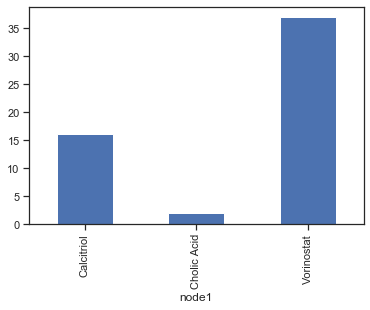

In [57]:
drugs_publications.groupby('node1')["node2"].count().plot.bar();

##### We could also check whether combinations of drugs among the shorted list have been previouly used (co-mentioned in the literature)

In [58]:
drug_combinations_query = selected_queries['association_combination_drug_disease_publication']['query'].format(",".join(reduced_drug_list),",".join(diseases),",".join(reduced_drug_list),",".join(diseases))

In [59]:
drugs_combinations = connector.getCursorData(driver=driver, query=drug_combinations_query, parameters={})

In [60]:
drugs_combinations

Empty DataFrame
Columns: []
Index: []

##### No possible combinations

### 6) Proposed Drug Candidate: Vorinostat (https://www.drugbank.ca/drugs/DB02546) 

![Vorinostat](https://www.drugbank.ca/structures/DB02546/thumb.svg)

In [89]:
import pandas as pd
drug_result = drugs_proposed[drugs_proposed['node2']=='Vorinostat']
drug_result.columns = ["Drug_desc","Action","Drug_id","Protein","Drug_name","Drug_protein_source","Drug_interaction_type","Inhibition_score"]
drug_result['Side_effects'] = ";".join(side_effects[side_effects['node1']==drug_result["Drug_name"].tolist().pop()]['node2'].tolist())
drug_result['Publications'] = ";".join(drugs_publications[drugs_publications['node1']==drug_result['Drug_name'].tolist().pop()]['node2'].tolist())
protein_result = proteins_associated_lung_cancer[proteins_associated_lung_cancer['node1']==drug_result["Protein"].tolist().pop()]
protein_result.columns = ["Protein", "Disease", "Protein_disease_source", "Protein_disease_association_type", "Disease_score"]
result = pd.merge(drug_result, protein_result, on='Protein')
result = result[["Protein", "Disease", 
                 "Protein_disease_source", "Protein_disease_association_type", 
                 "Disease_score", "Drug_name", "Drug_id", "Drug_desc", "Action", "Drug_protein_source","Drug_interaction_type","Inhibition_score",
                 "Side_effects", "Publications"
                ]]

In [94]:
result

Protein      Disease Protein_disease_source  \
0  HDAC1~Q13547  lung cancer               DISEASES   

  Protein_disease_association_type  Disease_score   Drug_name  Drug_id  \
0                  ASSOCIATED_WITH           1.58  Vorinostat  DB02546   

                                           Drug_desc      Action  \
0  Vorinostat (rINN) or suberoylanilide hydroxami...  inhibition   

  Drug_protein_source Drug_interaction_type  Inhibition_score  \
0              STITCH               ACTS_ON             0.987   

                                        Side_effects  \
0  Hyperkinesis;Poor appetite;Xerostomia;Squamous...   

                                        Publications  
0  PMID:19150934;PMID:20663979;PMID:19933908;PMID...

In [96]:
regulation_result = regulation_table[regulation_table["identifier"]==drug_result["Protein"].tolist().pop()]
regulation_result

-log10 pvalue         FC                 Method  \
1885       2.700531 -10.363705  SAMR Two class paired   

                                                   Note         correction  \
1885  Maximum number of permutations: 4.0. Corrected...  FDR correction BH   

      group1   group2    identifier    log2FC  mean(group1)  mean(group2)  \
1885  CANCER  CONTROL  HDAC1~Q13547 -3.373468     30.665944     27.292476   

          padj    pvalue  rejected  s0  t-statistics  
1885  0.039683  0.001993      True   2     -1.008813

### References

- http://disease-ontology.org/
- http://stitch.embl.de/
- https://www.ncbi.nlm.nih.gov/pubmed/
- http://sideeffects.embl.de/
- https://www.drugbank.ca
- https://cytoscape.org/

- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6068348/
- https://neo4j.com/